In [11]:
import h5py
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
from sklearn.model_selection import GridSearchCV, cross_val_score
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report

# Data fetching and understand the train/test splits

In [2]:
h5f = h5py.File("SVHN_single_grey1.h5")
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
h5f.close()

D:\Anaconda3\envs\tfgpu\lib\site-packages\ipykernel_launcher.py:1: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  """Entry point for launching an IPython kernel.


In [3]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((42000, 32, 32), (42000,), (18000, 32, 32), (18000,))

In [ ]:
#Without resizing the image

In [4]:
Xtrain = X_train.reshape(42000,1024)
Xtest = X_test.reshape(18000,1024)
Xtrain /=255.0
Xtest /=255.0
ytrain = keras.utils.to_categorical(y_train, 10)   
ytest = keras.utils.to_categorical(y_test, 10) 

# Implement and apply a deep neural network classifier including

# Implement batch normalization for training the neural network

Used KerasClassifier to wrap the DNN with 4 hidden layer and 1000 neurons in each hidden layer.

In [ ]:
SGD optimizer is used.

In [5]:
def modelfn(inshape = 1024,nhidden=4,n_neu = 1000, learning_rate = 0.02,hid_act = "relu",o_act = "softmax"):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape = inshape))
    model.add(tf.keras.layers.BatchNormalization())
    for i in range(nhidden):
        model.add(tf.keras.layers.Dense(n_neu,activation = hid_act))
    model.add(tf.keras.layers.Dense(10,activation = o_act))
    model.compile(optimizer=tf.keras.optimizers.SGD(lr = learning_rate),loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [6]:
gen_model = tf.keras.wrappers.scikit_learn.KerasClassifier(modelfn)
Model1history = gen_model.fit(Xtrain,ytrain,epochs = 50,validation_data = (Xtest,ytest),callbacks = [tf.keras.callbacks.EarlyStopping(patience = 10)])

Train on 42000 samples, validate on 18000 samples
Epoch 1/50
42000/42000 [==============================] - 33s 776us/sample - loss: 1.4380 - accuracy: 0.5248 - val_loss: 1.0135 - val_accuracy: 0.6783
Epoch 2/50
42000/42000 [==============================] - 33s 776us/sample - loss: 0.8892 - accuracy: 0.7191 - val_loss: 0.8506 - val_accuracy: 0.7329
Epoch 3/50
42000/42000 [==============================] - 32s 763us/sample - loss: 0.7469 - accuracy: 0.7626 - val_loss: 0.7282 - val_accuracy: 0.7769
Epoch 4/50
42000/42000 [==============================] - 34s 816us/sample - loss: 0.6623 - accuracy: 0.7905 - val_loss: 0.6164 - val_accuracy: 0.8207
Epoch 5/50
42000/42000 [==============================] - 36s 866us/sample - loss: 0.5973 - accuracy: 0.8109 - val_loss: 0.7147 - val_accuracy: 0.7887
Epoch 6/50
42000/42000 [==============================] - 33s 792us/sample - loss: 0.5498 - accuracy: 0.8253 - val_loss: 0.5986 - val_accuracy: 0.8252
Epoch 7/50
42000/42000 [====================

# Print the classification accuracy metrics

In [7]:
gen_model.score(Xtest,ytest)

18000/18000 [==============================] - 3s 160us/sample - loss: 0.5968 - accuracy: 0.8559


0.8558889

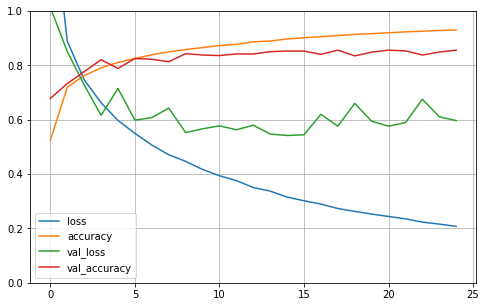

In [13]:
pd.DataFrame(Model1history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()


In [17]:
yPred = gen_model.predict(Xtest)
tf.math.confusion_matrix(y_test, yPred,num_classes=10)


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[1605,   17,   16,   23,   19,    7,   62,   16,   17,   32],
       [  28, 1584,   21,   31,   37,   10,   33,   61,   15,    8],
       [  17,   20, 1574,   42,   22,   12,   10,   67,   11,   28],
       [  23,   32,   36, 1364,    9,  112,   54,   34,   29,   26],
       [  19,   38,   23,   25, 1596,   13,   39,   15,   13,   31],
       [  12,   12,   17,   81,    6, 1467,  113,   10,   26,   24],
       [  36,   15,   16,   17,   17,   44, 1625,    7,   40,   15],
       [  12,   54,   37,   19,    9,   11,   12, 1638,    6,   10],
       [  25,   26,   31,   49,   13,   26,  153,   13, 1428,   48],
       [  53,   24,   18,   40,   21,   34,   27,   29,   33, 1525]])>

In [18]:
print("Accuracy Score" , accuracy_score(y_test, yPred))

Accuracy Score 0.8558888888888889


In [21]:
MetricsReport=classification_report(y_test,yPred)
print(MetricsReport)

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1814
           1       0.87      0.87      0.87      1828
           2       0.88      0.87      0.88      1803
           3       0.81      0.79      0.80      1719
           4       0.91      0.88      0.90      1812
           5       0.85      0.83      0.84      1768
           6       0.76      0.89      0.82      1832
           7       0.87      0.91      0.89      1808
           8       0.88      0.79      0.83      1812
           9       0.87      0.85      0.86      1804

    accuracy                           0.86     18000
   macro avg       0.86      0.86      0.86     18000
weighted avg       0.86      0.86      0.86     18000



# Performance tuning using Adagrad optimizer

In [ ]:
# used kernel initializer in hidden layer for weights with Adagrad optimizer

In [22]:
def modelfunc(inshape = 1024,nhidden=4,n_neu = 1000, learning_rate = 0.01,hid_act = "relu",o_act = "softmax"):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape = inshape))
    for i in range(nhidden):
        model.add(tf.keras.layers.Dense(n_neu,activation = hid_act,kernel_initializer = "he_normal"))
    model.add(tf.keras.layers.Dense(10,activation = o_act))
    model.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate = learning_rate),loss='categorical_crossentropy',metrics=['accuracy'])
    print(model.summary)
    return model

In [23]:
gen_model1 = tf.keras.wrappers.scikit_learn.KerasClassifier(modelfunc)


In [24]:
Modelhistory = gen_model1.fit(Xtrain,ytrain,epochs = 100,validation_data = (Xtest,ytest),callbacks = [tf.keras.callbacks.EarlyStopping(patience = 10)])

<bound method Network.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x000002D5861498C8>>
Train on 42000 samples, validate on 18000 samples
Epoch 1/100
42000/42000 [==============================] - 38s 894us/sample - loss: 1.7467 - accuracy: 0.3986 - val_loss: 1.2145 - val_accuracy: 0.6044
Epoch 2/100
42000/42000 [==============================] - 42s 1ms/sample - loss: 1.1497 - accuracy: 0.6301 - val_loss: 1.1625 - val_accuracy: 0.6282
Epoch 3/100
42000/42000 [==============================] - 42s 1ms/sample - loss: 0.9366 - accuracy: 0.7058 - val_loss: 0.8576 - val_accuracy: 0.7369
Epoch 4/100
42000/42000 [==============================] - 42s 1ms/sample - loss: 0.8246 - accuracy: 0.7409 - val_loss: 0.8438 - val_accuracy: 0.7437
Epoch 5/100
42000/42000 [==============================] - 41s 974us/sample - loss: 0.7436 - accuracy: 0.7691 - val_loss: 0.8120 - val_accuracy: 0.7476
Epoch 6/100
42000/42000 [==============================] - 40s 961us/sample - 

In [31]:
gen_model1.score(Xtrain,ytrain)

42000/42000 [==============================] - 6s 149us/sample - loss: 0.1299 - accuracy: 0.9603


0.96033335

In [26]:
gen_model1.score(Xtest,ytest)

18000/18000 [==============================] - 3s 151us/sample - loss: 0.6471 - accuracy: 0.8446


0.8446111

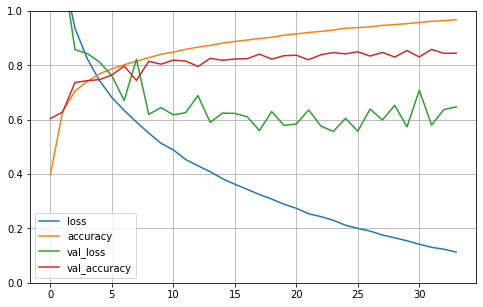

In [27]:
pd.DataFrame(Modelhistory.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [29]:
yPred = gen_model1.predict(Xtest, verbose=0)
tf.math.confusion_matrix(y_test, yPred,num_classes=10)

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[1614,   30,   12,   21,   36,   16,   23,   32,    7,   23],
       [  24, 1578,   21,   33,   64,   15,    9,   67,   11,    6],
       [  19,   20, 1531,   31,   44,   24,    4,   84,   13,   33],
       [  19,   35,   30, 1346,   22,  145,   17,   46,   36,   23],
       [  19,   37,    9,   17, 1660,   21,   17,   16,    6,   10],
       [  25,   17,    8,   54,   16, 1542,   43,   25,   18,   20],
       [  51,   17,   16,   18,   49,   82, 1523,   23,   43,   10],
       [  12,   64,   29,   14,   27,   19,    3, 1617,    7,   16],
       [  39,   42,   18,   51,   38,   98,   80,   20, 1384,   42],
       [  73,   31,   26,   38,   48,   82,   11,   48,   39, 1408]])>

In [30]:
print("Accuracy Score" , accuracy_score(y_test, yPred))

Accuracy Score 0.8446111111111111


In [ ]:
Adagrad optimizer with other parameters, model looks to overfit trainining dataset.